# Détection de faux billets

* Importation des bibliothèques:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
from sklearn.metrics import mean_absolute_error
import joblib
from joblib import dump, load
import pickle
import time 
from fonction import *

* Importation des fichiers:

In [2]:
df_billets = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\billets.csv",sep=';')
test_billets = pd.read_csv(r"C:\Users\Utilisateur\OneDrive\Bureau\billets_production.csv")

In [3]:
df_billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [4]:
test_billets

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [5]:
df_billets.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [6]:
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [7]:
df_billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

* Visualisation des valeurs abérrantes:

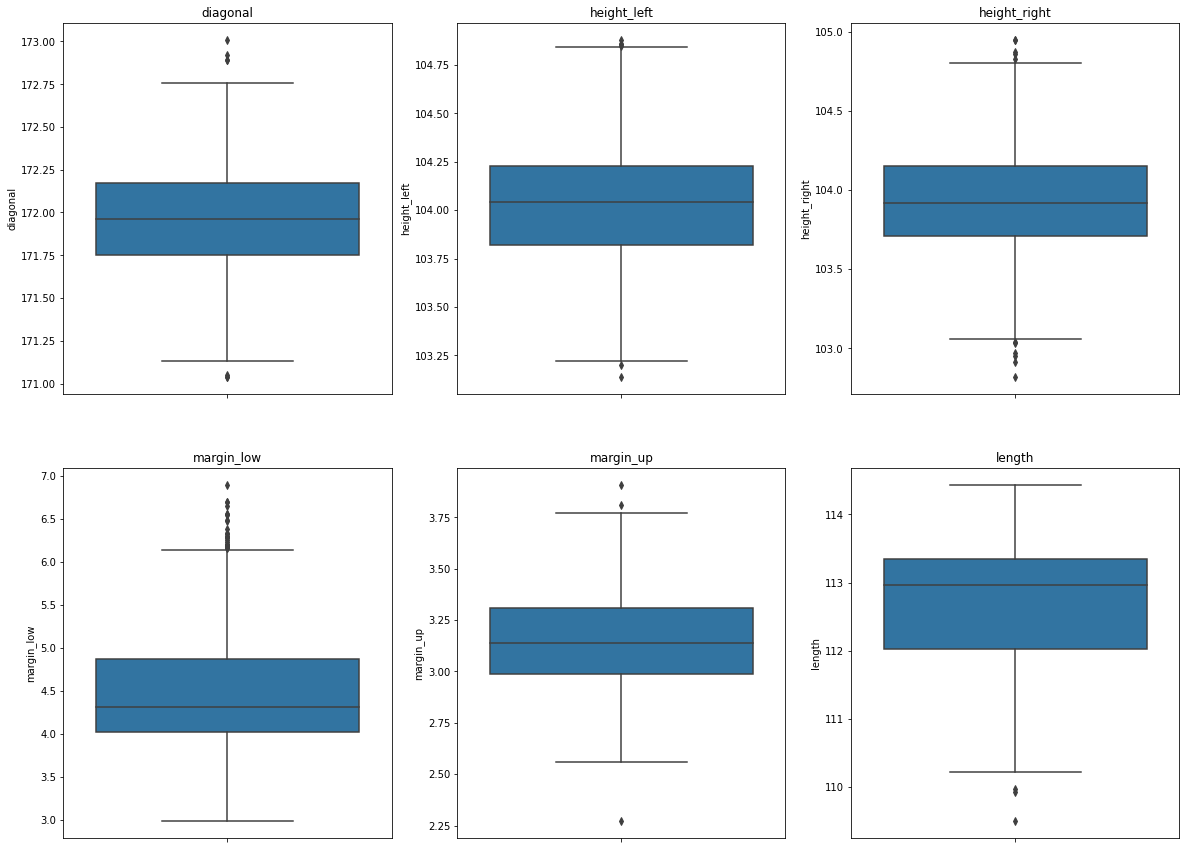

In [8]:
f, axes = plt.subplots(2,3,figsize = (20,15))

s = sns.boxplot(y=df_billets.diagonal,ax=axes[0, 0])
axes[0, 0].set_title('diagonal')

s = sns.boxplot(y=df_billets.height_left,ax=axes[0, 1])
axes[0, 1].set_title('height_left')

s=sns.boxplot(y=df_billets.height_right,ax=axes[0, 2])
axes[0, 2].set_title('height_right')

s=sns.boxplot(y=df_billets.margin_low,ax=axes[1, 0])
axes[1, 0].set_title('margin_low')

s=sns.boxplot(y=df_billets.margin_up,ax=axes[1, 1])
axes[1, 1].set_title('margin_up')

s=sns.boxplot(y=df_billets.length,ax=axes[1, 2])
axes[1, 2].set_title('length')

plt.show()

* Répartition des billets:

In [9]:
df_billets_true = df_billets.loc[df_billets['is_genuine']==True]
df_billets_true 

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
995,True,171.66,103.92,103.47,4.26,2.83,113.20
996,True,172.16,103.72,103.61,4.30,2.72,113.51
997,True,171.78,103.38,104.22,4.23,3.07,113.77
998,True,171.44,103.96,103.92,3.68,2.89,113.21


In [10]:
df_billets_true.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


In [11]:
df_billets_false = df_billets.loc[df_billets['is_genuine']==False]
df_billets_false 

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1000,False,172.28,103.95,103.91,4.78,3.31,111.40
1001,False,171.92,103.86,104.30,4.96,3.13,111.29
1002,False,171.59,104.14,104.38,4.97,3.47,111.22
1003,False,172.02,104.33,104.33,5.19,3.21,111.99
1004,False,172.55,104.25,104.23,5.60,3.13,111.72
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [12]:
df_billets_false.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


* Visualisation de la répartition des billets:

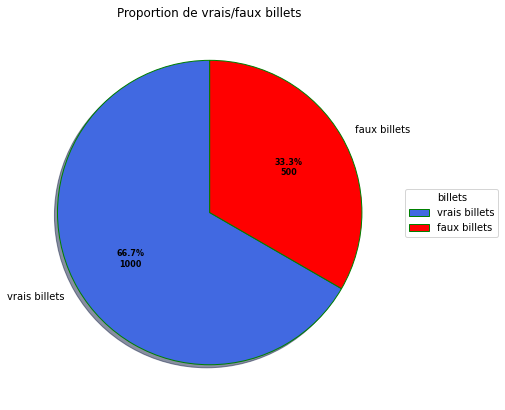

In [13]:
billets = ['vrais billets','faux billets'] 
  
data = [df_billets_true['is_genuine'].count(), df_billets_false['is_genuine'].count()] 
  
colors = ( "royalblue", "red") 
  
wp = { 'linewidth' : 1, 'edgecolor' : "green" } 
  
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n{:d}".format(pct, absolute) 
  
fig, ax = plt.subplots(figsize =(10, 7)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data),   
                                  labels = billets, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 
  
ax.legend(wedges, billets, 
          title ="billets", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 
  
plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Proportion de vrais/faux billets") 
  
plt.show() 

* Visualisation et comparaison de la distribution de chaque variable en fonction de sa nature:

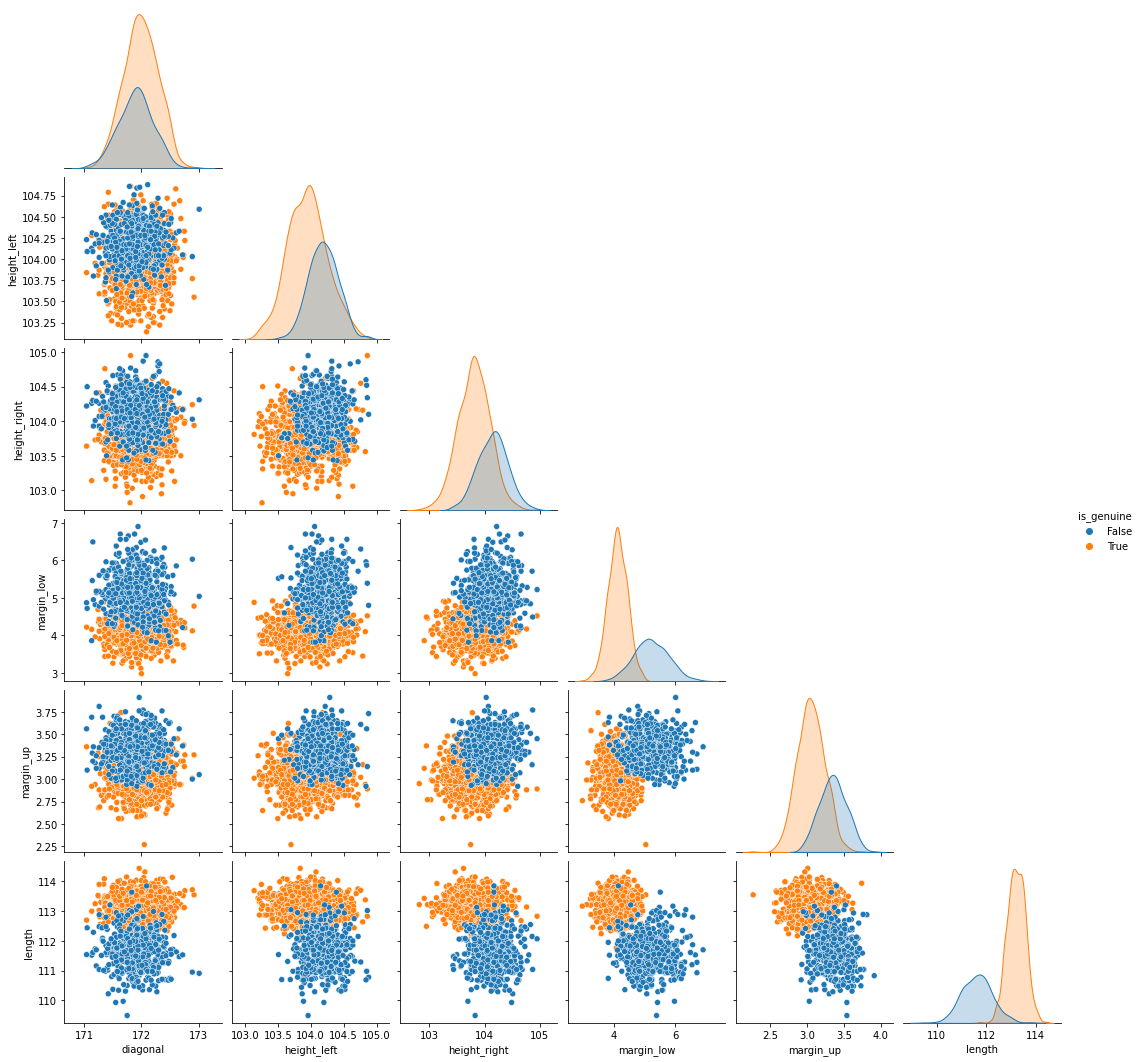

In [14]:
sns.pairplot(df_billets, hue='is_genuine', corner=True)
plt.show()

* Visualisation des dimensions moyennes pour un vrai et un faux billet:

In [15]:
df_billets.groupby('is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.90116,104.19034,104.14362,5.215935,3.35016,111.63064
True,171.98708,103.94913,103.80865,4.116097,3.05213,113.20243


* mediane

In [16]:
df_billets.groupby('is_genuine').median()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,171.91,104.18,104.16,5.19,3.35,111.630
True,171.99,103.95,103.81,4.11,3.05,113.205


* Voyons s'il existe une différence de dimmension importante entre un faux et un vrai billet:

Text(0.5, 1.0, 'length')

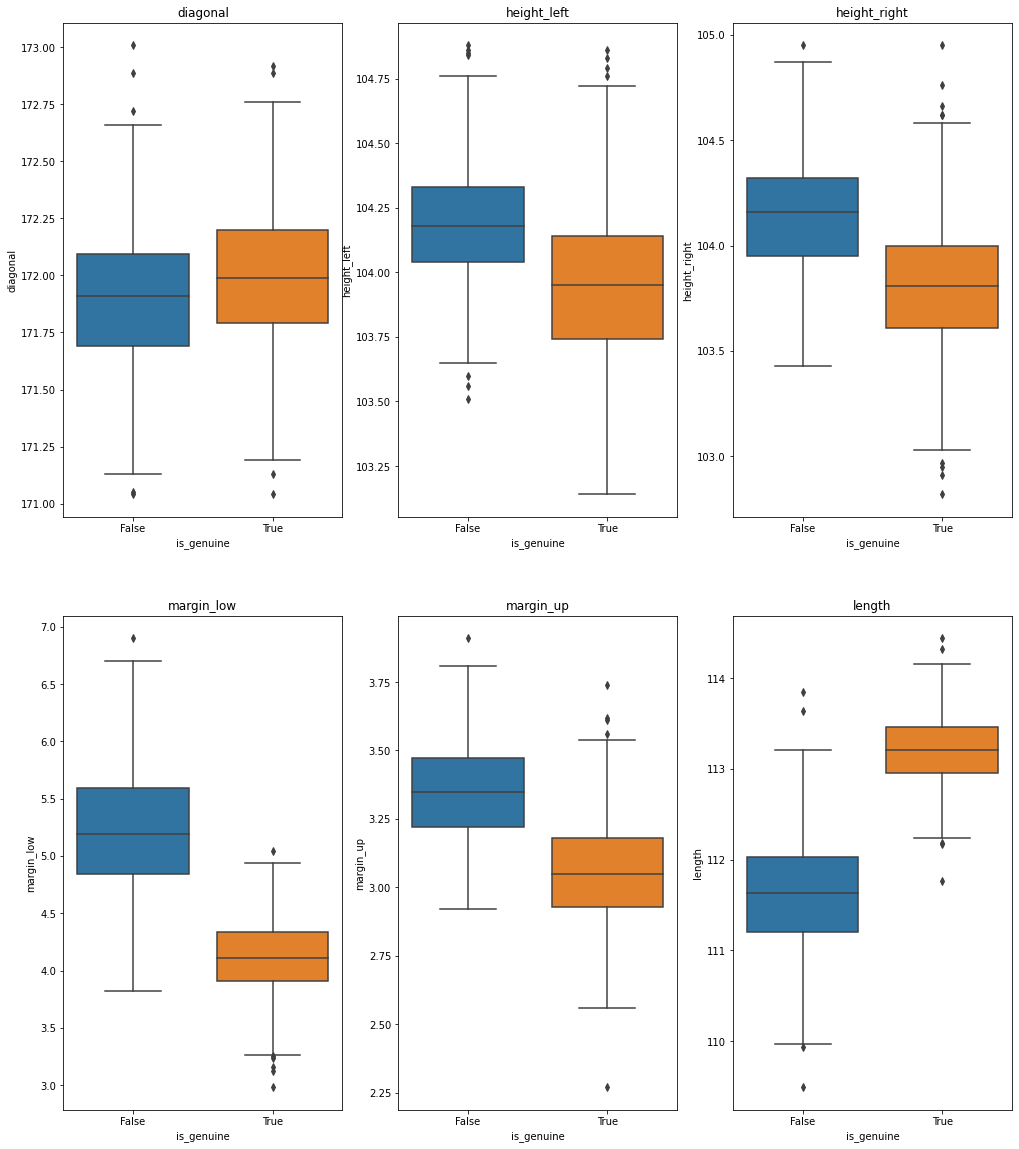

In [17]:
f, axes = plt.subplots(2,3,figsize = (17,20))
sns.boxplot(y='diagonal', x='is_genuine', data=df_billets,ax=axes[0, 0])
axes[0, 0].set_title('diagonal')
sns.boxplot(y='height_left', x='is_genuine', data=df_billets,ax=axes[0, 1])
axes[0, 1].set_title('height_left')
sns.boxplot(y='height_right', x='is_genuine', data=df_billets,ax=axes[0, 2])
axes[0, 2].set_title('height_right')
sns.boxplot(y='margin_low', x='is_genuine', data=df_billets,ax=axes[1, 0])
axes[1, 0].set_title('margin_low')
sns.boxplot(y='margin_up', x='is_genuine', data=df_billets,ax=axes[1, 1])
axes[1, 1].set_title('margin_up')
sns.boxplot(y='length', x='is_genuine', data=df_billets,ax=axes[1, 2])
axes[1, 2].set_title('length')

Remarque sur la différence de dimension entre un faux et un vrai billet:
                                                
    diagonal: peu de différence entre le vrai et le faux;
    hauteur gauche: les faux sont legèrement plus grand coté gauche avec un minimum qui ne sera jamais sous les 103.50mm;
    hauteur droite: coté droit les faux sont aussi legerement plus grand;
    marge entre le bord inferieur et l'image: les faux sont beaucoup plus grand;
    marge entre le bord supérieur et l'image: les faux sont legèrement plus grand;
    longueur: les vrais sont beaucoup plus long et ont des minimums beaucoup plus grand;

Nous remarquons qu'en moyenne les faux billets sont plus grands sur 4 dimensions géométriques et plus petits sur 2 dimensions.

Certaines variables semblent plus discriminantes que d'autres : la marge entre le bord inferieur et l'image ainsi que la longueur.

* Essayons de voir si ces variables peuvent montrer à elles seules la véracité du billet:

In [18]:
test_echantillons = test_billets.copy()
test_echantillons = test_echantillons.rename(columns={"id": "is_genuine"})
cols = test_echantillons.columns.tolist()
cols = cols[-1:] + cols[:-1]
test_echantillons = test_echantillons[cols]
test_echantillons

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,A_1,171.76,104.01,103.54,5.21,3.30,111.42
1,A_2,171.87,104.17,104.13,6.00,3.31,112.09
2,A_3,172.00,104.58,104.29,4.99,3.39,111.57
3,A_4,172.49,104.55,104.34,4.44,3.03,113.20
4,A_5,171.65,103.63,103.56,3.77,3.16,113.33


In [19]:
df_test_echantillons =pd.concat([test_echantillons, df_billets])
df_test_echantillons

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,A_1,171.76,104.01,103.54,5.21,3.30,111.42
1,A_2,171.87,104.17,104.13,6.00,3.31,112.09
2,A_3,172.00,104.58,104.29,4.99,3.39,111.57
3,A_4,172.49,104.55,104.34,4.44,3.03,113.20
4,A_5,171.65,103.63,103.56,3.77,3.16,113.33
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


* Visualisation de la comparaison de la longueur des billets de l'echantillon à tester avec les vrais et faux billets:

Text(0.5, 1.0, 'Comparaison de la longueur du billet')

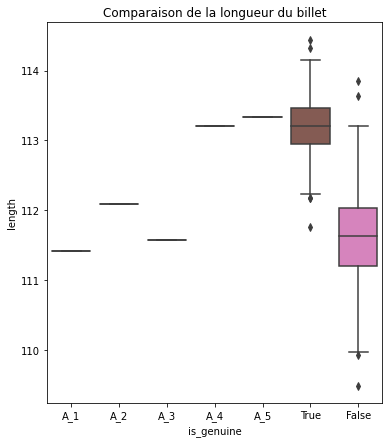

In [20]:
plt.subplots(figsize = (6,7))
sns.boxplot(y='length', x='is_genuine', data=df_test_echantillons).set_title('Comparaison de la longueur du billet')

Text(0.5, 1.0, 'Comparaison de la marge inferieure du billet')

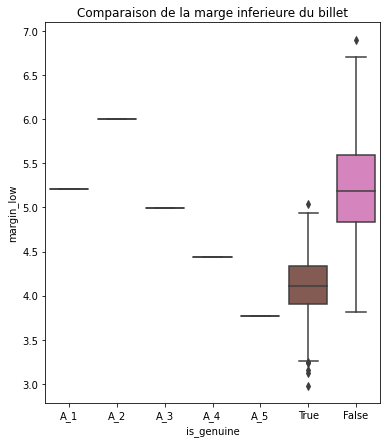

In [21]:
plt.subplots(figsize = (6,7))
sns.boxplot(y='margin_low', x='is_genuine', data=df_test_echantillons).set_title('Comparaison de la marge inferieure du billet')

En comparant seulement les données des variables les plus discriminantes, nous pouvons dire que les billets A_1, A_2, A_3 semblent etre de faux billets. Et les billets A_4, A_5 semblent etre de vrais billets. 

Nous pouvons ici faire cette remarque sans calculer la distance entre la mediane des vrais et faux billets en comparaison avec l'echantillon de billets car cela peut s'observer facilement.

Nous allons voir par la suite si les prédictions à l'aide d'algorithme confirment ces hypothèses.

##### Voyons si nous pouvons trouver la véracité des billets en calculant la distance entre la mediane (des variables les plus discriminantes) des vrais et faux billets:

In [22]:
test_billets_median = test_billets.copy()

* Test sur l'echantillon de billets:

In [23]:
test_length_median(test_billets_median, df_billets, 'length', 'margin_low')

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine_1,is_genuine_2
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,True


* Enregistrement du model:

In [24]:
dump(test_length_median,"test_length_median.joblib")

['test_length_median.joblib']

* Test sur le fichier billets:

In [25]:
df_test_billets = df_billets.copy()

In [26]:
def test_length_median2(data, var_1, var_2) : 
    
    data['median_true_length'] = df_billets_true[var_1].median()
    data['median_false_length'] = df_billets_false[var_1].median()
    data['median_true_margin_low'] = df_billets_true[var_2].median()
    data['median_false_margin_low'] = df_billets_false[var_2].median()
    
    #Calcul de la distance entre la valeur à tester et la mediane des faux billets
    data['result_false_length'] = (data['median_false_length'] - data[var_1])**2
    data['result_false_margin_low'] = (data['median_false_margin_low'] - data[var_2])**2
    
    #Calcul de la distance entre la valeur à tester et la mediane des vrais billets
    data['result_true_length'] = (data['median_true_length'] - data[var_1])**2
    data['result_true_margin_low'] = (data['median_true_margin_low'] - data[var_2])**2
    
    
    data['is_genuine_1'] = np.where(data['result_false_length'] > data['result_true_length'], True, False)
    data['is_genuine_2'] = np.where(data['result_false_margin_low'] > data['result_true_margin_low'], True, False)
        
    
    return(data[['diagonal','height_left','height_right','margin_low','margin_up','length', 'is_genuine','is_genuine_1','is_genuine_2']])

In [27]:
test_length_median2(df_test_billets, 'length', 'margin_low')

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine,is_genuine_1,is_genuine_2
0,171.81,104.86,104.95,4.52,2.89,112.83,True,True,True
1,171.46,103.36,103.66,3.77,2.99,113.09,True,True,True
2,172.69,104.48,103.50,4.40,2.94,113.16,True,True,True
3,171.36,103.91,103.94,3.62,3.01,113.51,True,True,True
4,171.73,104.28,103.46,4.04,3.48,112.54,True,True,True
...,...,...,...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28,False,False,True
1496,172.19,104.63,104.44,5.27,3.37,110.97,False,False,False
1497,171.80,104.01,104.12,5.51,3.36,111.95,False,False,False
1498,172.06,104.28,104.06,5.17,3.46,112.25,False,False,False


* Vérifions la précision de nos prédiction avec la longueur du billet:

In [28]:
df_test_billets2 = df_billets.copy()
df_test_billets2 = test_length_median2(df_test_billets, 'length', 'margin_low')

In [29]:
y_true_test = df_test_billets2['is_genuine']
y_pred_test = df_test_billets2['is_genuine_1']

metrics.adjusted_rand_score(y_true_test, y_pred_test)

0.8338463274614112

Si nous utilisons seulement les données de la longueur du billet, nous avons une prédiction correct des billets à 83%.

La variable longueur ne peut pas justifier à elle seule de la véracité d'un billet.

* Vérifions la précision de nos prédiction avec la marge inferieure du billet:

In [30]:
y_true_test = df_test_billets2['is_genuine']
y_pred_test = df_test_billets2['is_genuine_2']

metrics.adjusted_rand_score(y_true_test, y_pred_test)

0.645978235577606

Si nous utilisons seulement les données de la marge inferieure du billet, nous avons une prédiction correct des billets à 65%.

* Visualisation des corrélations entre les variables:

In [31]:
df_test = df_billets.dropna(inplace=False)
df_test.corr()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


* Matrice de corrélation:

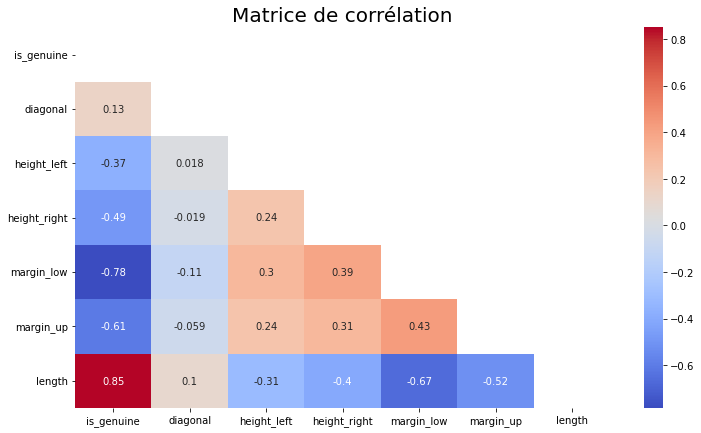

In [32]:
mask = np.triu(np.ones_like(df_billets.corr())) 
plt.figure(figsize=(12, 7))
dataplot = sns.heatmap(df_test.corr(), cmap="coolwarm", annot=True, mask=mask) 
plt.title('Matrice de corrélation', fontsize=20) 
plt.show() 

* Confirmation de corrélation entre les variables les plus corrélées:

##### Lien entre margin_low et margin_up

* Test de normalité:

In [33]:
stats.shapiro(df_test['margin_low'])

ShapiroResult(statistic=0.9377838373184204, pvalue=2.828552677965396e-24)

Ici p_value<0.05 donc la distribution ne suit pas une loi normale. Nous appliquerons donc un test non-paramétrique.

In [34]:
stats.spearmanr(df_test['margin_up'],df_test['margin_low'])

SpearmanrResult(correlation=0.42136053665775924, pvalue=4.820137314428435e-64)

p_value<0.05 donc H0 acceptée. Il y a donc corrélation entre margin_up et margin_low.

##### Lien entre is_genuine et length

* Test de normalité:

In [35]:
stats.shapiro(df_test['length'])

ShapiroResult(statistic=0.9163146615028381, pvalue=1.076909632161875e-27)

Ici p_value<0.05 donc la distribution ne suit pas une loi normale. Nous appliquerons donc un test non-paramétrique.

* Longueur du billet par catégorie:

In [36]:
df_billets_true_length = df_billets_true['length']
df_billets_false_length = df_billets_false['length']

Une des 3 conditions de validité d’une ANOVA est de chercher à démontrer que les variances de chaque groupe sont égales:

Le test de Bartlett permet de déterminer si les variances entre plusieurs groupes sont égales ou non.

In [37]:
from scipy.stats import bartlett

In [38]:
bartlett(df_billets_true_length,df_billets_false_length)

BartlettResult(statistic=207.23111965352825, pvalue=5.520465521419425e-47)

Hypothèses:

    H0 : Les variances de chaque groupe sont égales si p-value > 5%
    H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

Ici p-value<5% donc les variances de chaque groupe ne sont pas toutes égales. Nous ne pourrons pas utilisé le test d'Anova.

Le test de Kruskal-Wallis est souvent utilisé comme une alternative à l'ANOVA dans le cas où l'hypothèse de normalité n'est pas acceptable.

In [39]:
from scipy.stats import kruskal
stats.kruskal(df_billets_true_length,df_billets_false_length)

KruskalResult(statistic=936.2619713329428, pvalue=1.2855082224141737e-205)

Hypothèses:

    H0 = Les différences entre certaines médianes sont statistiquement significatives si pvalue < 5%
    H1 = Les différences entre les médianes ne sont pas statistiquement significatives si pvalue > 5% 

pvalue < à 0.05, alors on peut parler de différences significatives. Il y a donc une très forte corrélation entre la longueur du billet et sa véracité.

* Essayons de voir si ces corrélations sont confirmées avec le cercle de corrélation via une ACP:

In [40]:
df_test_pca = df_test.drop(columns=['is_genuine'])

In [41]:
from sklearn import preprocessing
std_scale = preprocessing.MinMaxScaler().fit(df_test_pca)
X_scaled = std_scale.transform(df_test_pca)
df_norm = pd.DataFrame(X_scaled, columns=df_test_pca.columns, index=df_test_pca.index)
df_norm

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.691511
1,0.213198,0.126437,0.367647,0.201531,0.439024,0.745342
2,0.837563,0.770115,0.289216,0.362245,0.408537,0.759834
3,0.162437,0.442529,0.504902,0.163265,0.451220,0.832298
4,0.350254,0.655172,0.269608,0.270408,0.737805,0.631470
...,...,...,...,...,...,...
1495,0.360406,0.712644,0.617647,0.367347,0.500000,0.370600
1496,0.583756,0.856322,0.750000,0.584184,0.670732,0.306418
1497,0.385787,0.500000,0.593137,0.645408,0.664634,0.509317
1498,0.517766,0.655172,0.563725,0.558673,0.725610,0.571429


In [42]:
test_acp=df_norm

* Création de l'objet pca qui va contenir le résultat de l'ACP:

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

# suppression des colonnes non numériques
X_pca = test_acp.reset_index(drop=True)
pca = PCA()
pca.fit(X_pca)

PCA()

* Résumé des variances expliquées:

In [44]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Variance expliquée" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    }
)
eig

,Dimension,Variance expliquée,% variance expliquée,% cum. var. expliquée
0,Dim1,0.071962,45.0,45.0
1,Dim2,0.025786,16.0,61.0
2,Dim3,0.021951,14.0,75.0
3,Dim4,0.017776,11.0,86.0
4,Dim5,0.013070,8.0,94.0
5,Dim6,0.009681,6.0,100.0


*Les 4 premiers plans factoriels permettent d'expliquer 85% de l'inertie.*

In [45]:
df_pca = pca.transform(X_pca)
df_norm_pca = test_acp.reset_index()

* Transformation des données en 4 dimensions:

In [46]:
# Transformation en DataFrame pandas
PCA_df = pd.DataFrame({
    "Dim1" : df_pca[:,0], 
    "Dim2" : df_pca[:,1],
    "Dim3" : df_pca[:,2],
    "Dim4" : df_pca[:,3],
    "is_genuine" : df_test["is_genuine"]})

# Résultat (premières lignes)
PCA_df

,Dim1,Dim2,Dim3,Dim4,is_genuine
0,0.285600,0.296842,0.262430,0.506150,True
1,-0.342375,-0.394289,-0.015060,0.013713,True
2,-0.129060,0.451077,0.015486,-0.199646,True
3,-0.245545,-0.198363,0.212608,0.181543,True
4,0.001639,-0.001452,0.217065,-0.195206,True
...,...,...,...,...,...
1495,0.270243,0.020796,0.132917,0.058454,False
1496,0.561732,0.229558,-0.004306,0.038456,False
1497,0.306113,-0.131785,-0.047206,-0.018931,False
1498,0.278308,0.082465,-0.008970,-0.043669,False


* Cercle de correlation

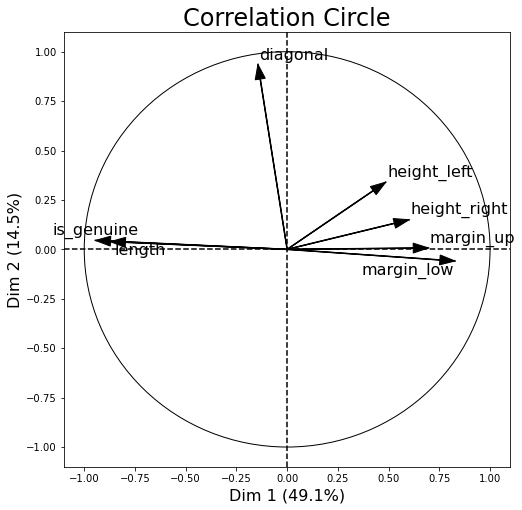

In [47]:
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import StandardScaler

X = df_test.values
attribute_names = df_test.columns


X_norm = StandardScaler().fit_transform(X) # Normalizing the feature columns is recommended (X - mean) / std

fig, correlation_matrix = plot_pca_correlation_graph(
    X_norm, 
    attribute_names,
    dimensions=(1, 2),
    figure_axis_size=8
) 

On a confirmation ici que marin_up et margin_low sont très corrélés entre eux.

Et la longueur du billet est très corrélée avec la véracité de celui-ci.

##### Nous allons donc essayer de prédire les valeurs manquantes:

*Nous essayerons de comparer deux méthodes de prédiction pour choisir ensuite la plus performante.*

### Comparaison entre une regression lineaire simple et multiple:

* Régression linéaire simple:

In [48]:
reg_simp = smf.ols('margin_low ~ margin_up', data=df_test).fit()
print(reg_simp.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     334.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):           1.92e-67
Time:                        21:34:25   Log-Likelihood:                -1325.1
No. Observations:                1463   AIC:                             2654.
Df Residuals:                    1461   BIC:                             2665.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5831      0.214      2.725      0.0

La p-valeur est inférieure à 5 %, on rejette donc l'hypothèse selon laquelle le paramètre est égal à 0. Ici, on voit que la variable margin_up est significative.

* Visualisation de la droite de régression

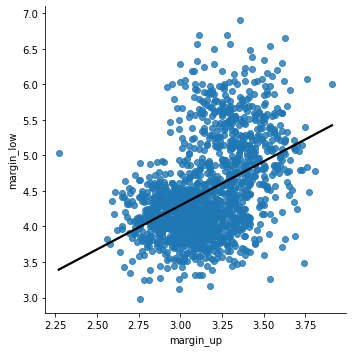

In [49]:
ax = sns.lmplot(x="margin_up", y="margin_low", data=df_test, ci=None, line_kws={'color':'black'})
ax.set(xlabel='margin_up', ylabel='margin_low')
plt.show()

* Visualisation des valeurs prédites en fonction des valeurs observées:

In [50]:
df_test_reg = df_test.copy()

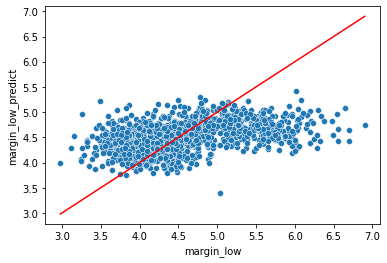

In [51]:
df_test_reg['margin_low_predict'] = reg_simp.predict()

X_plot = [df_test_reg['margin_low'].min(), df_test_reg['margin_low'].max()]

ax = sns.scatterplot(x="margin_low", y="margin_low_predict", data=df_test_reg)
ax.set(xlabel='margin_low', ylabel='margin_low_predict')
plt.plot(X_plot, X_plot, color='r')
plt.show()

Si le modèle était parfait, les valeurs prédites et les valeurs observés seraient égales et alignées sur la droite y=x.

* Régression linéaire multiple:

In [52]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=df_test).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          4.75e-299
Time:                        21:34:26   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

Nous obtenons ici un coéfficient de détermination de: 𝑅2 vaut environ 0.62, et le  𝑅2  ajusté est d'environ 0.61.

Un bon ajustement linéaire se traduit par un R2 proche de 1 et nous sommes ici plus proche de 1 que de 0.

* Ajustement du model:

*Nous allons retirer les variables les moins significatives une par une.*

La variable ayant la p-valeur la plus élevée est : length (0.87).

In [53]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=df_test).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          2.12e-300
Time:                        21:34:26   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

La variable ayant la p-valeur la plus élevée est : diagonal (0.72).

In [54]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=df_test).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          8.76e-302
Time:                        21:34:26   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

La variable ayant la p-valeur la plus élevée est : height_right (0.50).

In [55]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=df_test).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          3.63e-303
Time:                        21:34:26   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

La variable ayant la p-valeur la plus élevée est : height_left (0.45).

In [56]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=df_test).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Mon, 26 Sep 2022   Prob (F-statistic):          1.24e-304
Time:                        21:34:26   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

Nous sommes ici en présence des variables les plus significatives, donc nous utiliserons ce model pour effectuer les prévisions.

* Vérification de la colinéarité des variables:

il faut verifier ici qu'il n'y a pas de corrélation entre les variables explicatives (margin_up et is_genuine).

In [57]:
#coéfficient de détermination: 
R2 = 0.62

In [58]:
#facteur d'influence de la variance, noté VIF
VIF = 1/(1-R2)
VIF

2.6315789473684212

In [59]:
#La tolérance, notée TOL est l'inverse du facteur VIF
TOL = 1/VIF
TOL

0.37999999999999995

Pour éviter les problèmes de colinéarité, il faut avoir une valeur VIF<10 (et par conséquent une valeur TOL>0.1 ).

Ici n'y a donc pas de problème de colinéarité.

* Comparaison des résultats entre une regression lineaire avec une seule variable (simple) et une regression lineaire avec les variables les plus significatives (multiple).

In [60]:
def imputation (data, mode=1):
    
    if mode==1: #train avec une variable margin_up 
        x = data[['margin_up']]
    elif mode==2: #train avec toutes les variables
        x = data[['is_genuine','diagonal','height_left','height_right','margin_up','length']]
    else:  #train avec les variables les plus significatives
        x = data[['is_genuine','margin_up']]

    y = data[['margin_low']]
      
    # divise l'ensemble des données en un set d'entraînement et un set de test avec une répartition 80% / 20%.
    # Attribuez à random_state une valeur quelconque, ce qui assure la cohérence.
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size=0.2) 

    #Création du modèle de régression linéaire:
    linereg=LinearRegression()
    linereg.fit(x, y)       
    
    beging =time.time()
    y_predict = linereg.predict(x_test)
    end =time.time()
    print(f'time={(end-beging)*1000}')
          
    #R2 est un indicateur utilisé en statistiques pour juger de la qualité d'une régression linéaire.
    r2 = r2_score(y_test, y_predict)
    print(f'r2 = {r2*100}')
    #On peut également le calculer d'une autre facon:
    precision = linereg.score(x_test, y_test)
    print(f'precision = {precision*100}')
    #l'erreur absolue moyenne est la différence moyenne entre les observations et la sortie du modèle (prédictions).
    mae = mean_absolute_error(y_test, y_predict)
    print(f'mae = {mae}')
    
    return linereg

In [61]:
imputation(df_test, mode=1)

time=0.9925365447998047
r2 = 15.244850032195334
precision = 15.244850032195334
mae = 0.47175780059666816


LinearRegression()

In [62]:
imputation(df_test, mode=2)

time=0.9996891021728516
r2 = 67.61582351626734
precision = 67.61582351626734
mae = 0.28942219267793756


LinearRegression()

In [63]:
imputation(df_test, mode=3)

time=1.9986629486083984
r2 = 67.41042906540571
precision = 67.41042906540571
mae = 0.28982832460053964


LinearRegression()

On observe deja une grande différence de performance lorsque l'on utilise une ou toutes les variables.

Lorsque l'on utilise toutes les variables, la regression semble etre plus performante.

* Mise en place du model avec les variables selectionnées:

In [64]:
x = df_test[['is_genuine','margin_up']]
y = df_test[['margin_low']]

In [65]:
#Création du modèle de régression linéaire:
lr = LinearRegression()
lr.fit(x, y) 

LinearRegression()

* Visualisation des valeurs manquantes:

In [66]:
valeurs_manquantes = df_billets[df_billets["margin_low"].isna()]
valeurs_manquantes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [67]:
#Création du x_test à partir des données correspondant aux NaN
x_test_select = valeurs_manquantes[['is_genuine','margin_up']]
x_test_select

,is_genuine,margin_up
72,True,3.25
99,True,3.14
151,True,3.02
197,True,3.62
241,True,3.02
251,True,2.95
284,True,3.23
334,True,3.00
410,True,3.12
413,True,3.16


* Prédictions des valeurs manquantes:

In [68]:
#Application du modèle sur x_test des données correspondant aux NaN pour faire des prédictions
y_prediction = lr.predict(x_test_select)
y_prediction

array([[4.07424786],
       [4.0975613 ],
       [4.12299415],
       [3.99582991],
       [4.12299415],
       [4.13782997],
       [4.07848666],
       [4.12723295],
       [4.10180011],
       [4.09332249],
       [4.12511355],
       [4.18869567],
       [4.13147176],
       [4.06365084],
       [4.19081507],
       [4.22048673],
       [4.11239713],
       [4.10815832],
       [4.07636726],
       [4.0996807 ],
       [4.12511355],
       [4.12935236],
       [4.14842699],
       [4.11239713],
       [4.13147176],
       [4.21624792],
       [4.12299415],
       [4.07000905],
       [4.12935236],
       [5.24592539],
       [5.254403  ],
       [5.28619406],
       [5.3052687 ],
       [5.20565671],
       [5.16114923],
       [5.17174625],
       [5.23956717]])

* Comparaison du résultat face aux données de la variable margin_low:

In [69]:
x_test_select_pred = x_test_select.copy()
x_test_select_pred['margin_low'] = y_prediction.round(2)
x_test_select_pred

,is_genuine,margin_up,margin_low
72,True,3.25,4.07
99,True,3.14,4.10
151,True,3.02,4.12
197,True,3.62,4.00
241,True,3.02,4.12
251,True,2.95,4.14
284,True,3.23,4.08
334,True,3.00,4.13
410,True,3.12,4.10
413,True,3.16,4.09


* Création d'un tableau pour facilité la visualisation:

In [70]:
data1 = pd.DataFrame(x_test_select_pred, columns=['is_genuine', 'margin_low']).assign(Location=1)
data2 = pd.DataFrame( df_billets, columns=['is_genuine', 'margin_low']).assign(Location=2)

In [71]:
cdf = pd.concat([data1, data2])    
cdf

,is_genuine,margin_low,Location
72,True,4.07,1
99,True,4.10,1
151,True,4.12,1
197,True,4.00,1
241,True,4.12,1
...,...,...,...
1495,False,4.42,2
1496,False,5.27,2
1497,False,5.51,2
1498,False,5.17,2


* Visualisation des données prédites face aux données réelles:

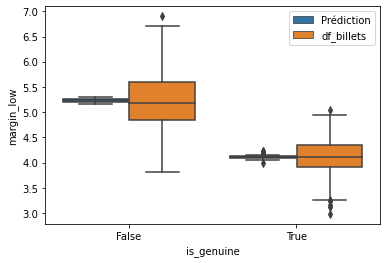

In [72]:
ax = sns.boxplot(x="is_genuine", y="margin_low", hue="Location", data=cdf)    
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Prédiction", "df_billets"])
plt.show()

*Les résultats obtenus sont pratiquement sur la médiane donc très cohérents avec les données réelles.*

* Remplacement des valeurs nulles par les valeurs prédites.

In [73]:
df_billets.loc[df_billets["margin_low"].isnull(), 'margin_low'] = y_prediction

* Vérification du remplacement des valeurs nulles:

In [74]:
df_billets.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

## Mise en concurrence de deux méthodes de prédiction: 

## Régression logistique:

In [75]:
billet = dict( zip (df_billets.is_genuine.unique(),df_billets.index.unique()))
print(billet)

x = df_billets[['diagonal','height_left','height_right','margin_low','margin_up','length']]
y = df_billets['is_genuine']

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)

model_reg_log = linear_model.LogisticRegression(random_state = 0)

model_reg_log.fit(x_train,y_train)

precision = model_reg_log.score(x_test,y_test)
print(precision*100)

{True: 0, False: 1}
99.73333333333333


* Enregistrement du model:

In [76]:
dump(model_reg_log, 'log_model_detection.joblib')

['log_model_detection.joblib']

* Matrice de confusion:

In [77]:
matrix = confusion_matrix(y_true=y_test, y_pred=model_reg_log.predict(x_test))
print(matrix)

[[125   1]
 [  0 249]]


Text(0.5, 257.44, 'Predicted label')

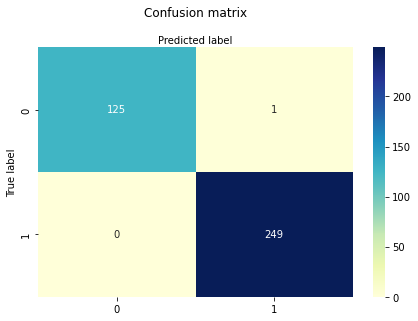

In [78]:
class_names=["Faux","Vrai"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))#xticklabels=["Faux","Vrai"], yticklabels=["Faux","Vrai"]
xticklabels =["Faux","Vrai"]#(tick_marks, class_names)
yticklabels=["Faux","Vrai"]#(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

Les prédictions correctes sont 125 vrais négatifs et 249 vrais positifs.

Les prédictions erronées sont 1 faux négatif et 0 faux positif.

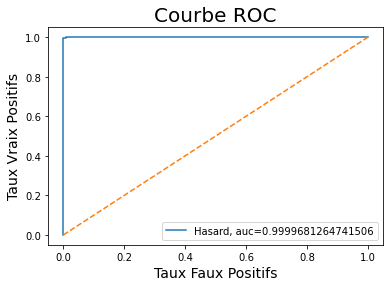

In [79]:
y_pred_proba = model_reg_log.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
x = [0,1]
y = [0,1]
plt.plot(fpr,tpr,label="Hasard, auc="+str(auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc=4)
plt.title('Courbe ROC', fontsize=20)
plt.ylabel('Taux Vraix Positifs', fontsize=14)
plt.xlabel('Taux Faux Positifs', fontsize=14)
plt.show()

*La courbe ROC permet de mesurer la performance (ici le taux de vrais positifs en fonction du taux de faux positifs).Une AUC de 0,5 (50%) indique que le marqueur est non-informatif. Une augmentation de l'AUC indique une amélioration des capacités discriminatoires, avec un maximum de 1,0 (100%).*

*Cette courbe sert également à comparer différents classifieurs. Plus une courbe a des valeurs élevées, plus l’aire sous la courbe est grande, moins le classifieur fait d’erreur.*

Nous sommes donc ici très proche de la perfection avec un score de 0.99.

* Le score de précision du modèle mesure le taux de prédictions positives par rapport au total des prédictions positives:

In [80]:
y_pred=model_reg_log.predict(x_test)
précision_score_reg_log = precision_score(y_test, y_pred)
print(f'Precision = {précision_score_reg_log*100}')

Precision = 99.6


*Nous avons donc ici 99.6% de chance que les vrais billets soit bien des vrais.*

* Le score de rappel (recall) mesure le taux de prédictions positif par rapport au total des positifs réels:

In [81]:
recall_score_reg_log = recall_score(y_test, y_pred)
print(f'Recall_score = {recall_score_reg_log*100}')

Recall_score = 100.0


*Nous avons effectivement retrouver tous les vrais billets, il n'y a eu aucun faux positif.*

* Le f_score peut être représenté comme une moyenne harmonique entre la précision et le score de rappel:

In [82]:
f1_score(y_test, y_pred)

0.9979959919839679

*Nous avons donc ici un taux de précision de 99.8% qui représente la performance du modèle d'apprentissage.*

### Algorithme regression logistique

* Prédiction à l'aide d'une regression logistique:

In [83]:
model_rl = load('log_model_detection.joblib')
test_billets_reg_log(r"C:\Users\Utilisateur\OneDrive\Bureau\billets_production.csv", model_rl)

,diagonal,height_left,height_right,margin_low,margin_up,length,predict_proba,is_genuine
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,0.006336,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,0.001259,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,0.001453,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,0.909670,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,0.999509,True


## Kmeans

*Nous allons effectuer un partionnement à l'aide de la méthode KMeans.*

Nous allons essayer de trouver quel serait le nombre de clusters optimales pour la suite de l'analyse.

* Calcul du coéfficient de silhouette pour chaque clusters:

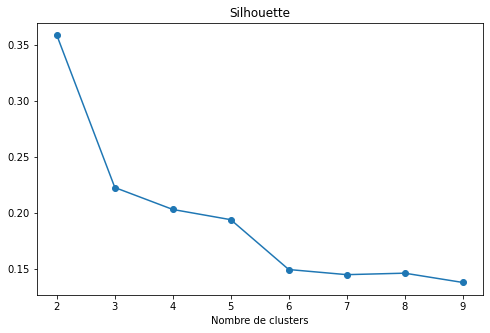

In [84]:
plt.figure(figsize=(8,5))
silhouettes = []
for num_clusters in range (2, 10):
    cls = cluster.KMeans(n_clusters=num_clusters,
                         n_init=1, init='random')
    cls.fit(df_norm)
    silh = metrics.silhouette_score(df_norm, cls.labels_)
    silhouettes.append(silh)
plt.title("Silhouette")
plt.xlabel("Nombre de clusters")
plt.plot(range(2, 10), silhouettes, marker='o')

Le coefficient de silhouette decroit avec le nombre de clusters et ce graphique nous indique qu'il faudrait privilégier 2 clusters, qui correspondent aux valeurs pour lesquelles le coéfficient de silhouette est le plus élevé.

* La méthode Elbow:

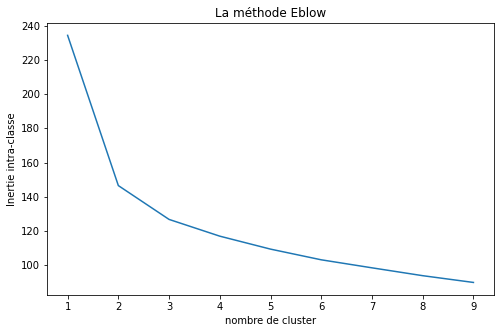

In [85]:
#Détermination de la valeur optimale de K
tab=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    tab.append(kmeans.inertia_)
plt.figure(figsize = (8, 5))
plt.plot(range(1,10),tab)
plt.title("La méthode Eblow")
plt.xlabel("nombre de cluster")
plt.ylabel("Inertie intra-classe")
plt.show()

On observe sur le graphique que la variance ne se réduit plus significativement à partir de 2 clusters. En effet, la “chute” de la courbe de variance (distortion) à 2 clusters est significativement plus grande que les autres.

In [86]:
#Clustering K-Means en 2 clusters
cls2 = cluster.KMeans(n_clusters=2, random_state=0)
cls2.fit(df_norm)
pd.Series(cls2.labels_).value_counts()

0    977
1    486
dtype: int64

In [87]:
df_norm_is_genuine = pd.merge(df_norm, df_test[['is_genuine']], left_index=True, right_index=True)
df_norm_is_genuine

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,0.390863,0.988506,1.000000,0.392857,0.378049,0.691511,True
1,0.213198,0.126437,0.367647,0.201531,0.439024,0.745342,True
2,0.837563,0.770115,0.289216,0.362245,0.408537,0.759834,True
3,0.162437,0.442529,0.504902,0.163265,0.451220,0.832298,True
4,0.350254,0.655172,0.269608,0.270408,0.737805,0.631470,True
...,...,...,...,...,...,...,...
1495,0.360406,0.712644,0.617647,0.367347,0.500000,0.370600,False
1496,0.583756,0.856322,0.750000,0.584184,0.670732,0.306418,False
1497,0.385787,0.500000,0.593137,0.645408,0.664634,0.509317,False
1498,0.517766,0.655172,0.563725,0.558673,0.725610,0.571429,False


In [88]:
#Récupération des clusters attribués à chaque individu (classes d'appartenance)
clusters_kmeans2 = cls2.labels_

In [89]:
df_billets_kmeans = df_norm_is_genuine.set_index('is_genuine')
df_billets_kmeans

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
True,0.390863,0.988506,1.000000,0.392857,0.378049,0.691511
True,0.213198,0.126437,0.367647,0.201531,0.439024,0.745342
True,0.837563,0.770115,0.289216,0.362245,0.408537,0.759834
True,0.162437,0.442529,0.504902,0.163265,0.451220,0.832298
True,0.350254,0.655172,0.269608,0.270408,0.737805,0.631470
...,...,...,...,...,...,...
False,0.360406,0.712644,0.617647,0.367347,0.500000,0.370600
False,0.583756,0.856322,0.750000,0.584184,0.670732,0.306418
False,0.385787,0.500000,0.593137,0.645408,0.664634,0.509317


In [90]:
#Identification des 02 groupes obtenus
groupes_kmeans2 = clusters_kmeans2
#Index trié des groupes
idg = np.argsort(groupes_kmeans2)
#Affichage des pays selon leurs groupes
df_kmeans2 = pd.DataFrame(df_billets_kmeans.index[idg], groupes_kmeans2[idg]).reset_index()
df_kmeans2 = df_kmeans2.rename(columns={'index':'Groupe'})
df_kmeans2

,Groupe,is_genuine
0,0,True
1,0,True
2,0,True
3,0,True
4,0,True
...,...,...
1458,1,False
1459,1,False
1460,1,False
1461,1,False


In [91]:
matrix2 = pd.crosstab(df_kmeans2["Groupe"], df_kmeans2["is_genuine"], margins=True)
matrix2 = matrix2.drop(columns='All')
matrix2 = matrix2.iloc[:2]
matrix2

is_genuine,False,True
Groupe,,
0,12,965
1,480,6


Text(0.5, 257.44, 'Predicted label')

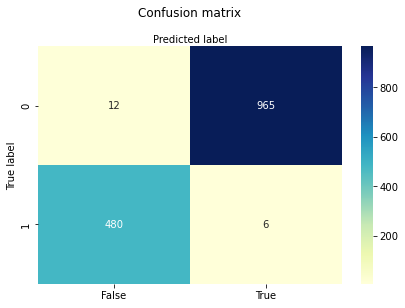

In [92]:
class_names=["Faux","Vrai"] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))#xticklabels=["Faux","Vrai"], yticklabels=["Faux","Vrai"]
xticklabels =["Faux","Vrai"]#(tick_marks, class_names)
yticklabels=["Faux","Vrai"]#(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(matrix2), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

Les prédictions correctes sont 480 vrais négatifs et 965 vrais positifs.

Les prédictions erronées sont 6 faux négatif et 12 faux positif.

*Ce model peut etre problematique dans le sens ou l'on aurait des faux billets qui pourraient etre mis à disposition des clients.*

* Calcule du score de l'indice Rand ajusté (ARI) pour évaluer les performances des clusters:

In [93]:
y_true = df_kmeans2['is_genuine']
y_pred_kmeans = df_kmeans2['Groupe']
metrics.adjusted_rand_score(y_true, y_pred_kmeans)

0.9507704773416735

Nous avons ici un score très élevé mais en dessous des résultats obtenus à l'aide de la régression logistique qui est plus performante.

* Visualisation des clusters sur le premier plan factoriel:

In [94]:
df_pca_groupes_kmeans2 = pd.merge(PCA_df, df_kmeans2, left_index=True, right_index=True)
df_pca_groupe0_Kmeans2 = df_pca_groupes_kmeans2[df_pca_groupes_kmeans2['Groupe'] == 0]
df_pca_groupe1_Kmeans2 = df_pca_groupes_kmeans2[df_pca_groupes_kmeans2['Groupe'] == 1]

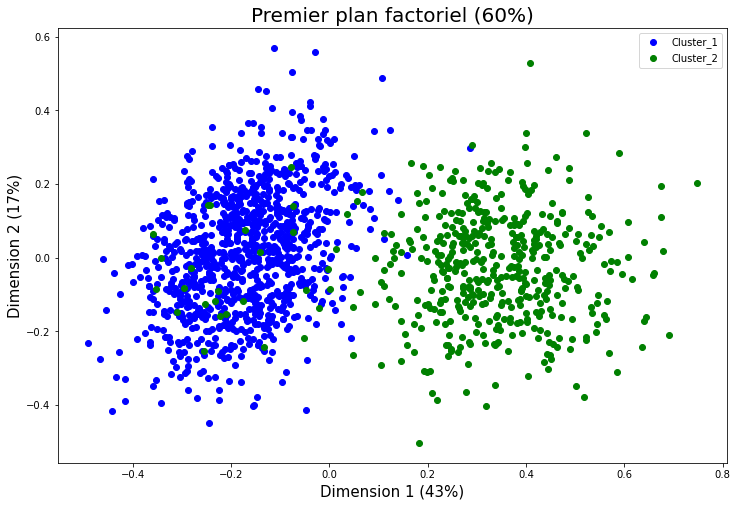

In [95]:
plt.subplots(figsize = (12,8))
x = df_pca_groupe0_Kmeans2['Dim1']
y = df_pca_groupe0_Kmeans2['Dim2']
plt.scatter(x,y, c='b',label='Cluster_1')
x1 = df_pca_groupe1_Kmeans2['Dim1']
y1 = df_pca_groupe1_Kmeans2['Dim2']
plt.scatter(x1,y1, c='g',label='Cluster_2')

plt.xlabel('Dimension 1 (43%)',fontsize = 15)
plt.ylabel("Dimension 2 (17%)",fontsize = 15) 
plt.title('Premier plan factoriel (60%)',fontsize = 20 )
plt.legend()
plt.show() 

* Prédiction à l'aide des centroides KMeans:

In [96]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(x_train)

KMeans(n_clusters=2, random_state=0)

In [97]:
# récupération des coordonnées des centroïdes pour utilisation dans init
kmeans_centroides = kmeans.cluster_centers_

In [98]:
kmeans = KMeans(n_clusters=2, init = kmeans_centroides, n_init=1)
kmeans.fit(x_train)
dump(kmeans,"kmeans_predictions.joblib")

['kmeans_predictions.joblib']

### Algorithme KMeans

In [99]:
model_kmeans = load("kmeans_predictions.joblib")
test_billets_kmeans(r"C:\Users\Utilisateur\OneDrive\Bureau\billets_production.csv", model_kmeans)

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True
